**Library Imports**

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

In [2]:
import os
import sys
print(sys.version)   # Python version information

3.4.4 |Anaconda 2.4.0 (64-bit)| (default, Jan 11 2016, 13:54:01) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


In [3]:
from sympy import *  # Symbolic mathematics
import sympy

In [4]:
import numpy as np   # N-Dimensional arrays and numerical routines
import pandas as pd  # Data structures and data analysis tools
import scipy         # Numerical routines

In [5]:
#import numba        # Decorators for speeding up python functions

In [6]:
#from astropy import constants  # Physical Constants
#from astropy import units      # Physical Units

In [7]:
import matplotlib as mpl  # Standard plotting library
import matplotlib.pyplot as plt 
import seaborn as sns     # Statistical plotting and improved plot style
#import bokeh             # Interactive visualization library

In [8]:
from sympy.utilities.autowrap import ufuncify  # Creates numerical methods 
                                               # from symbolic expressions

In [9]:
from sympy import abc       # Symbolic variables
from sympy import pi as Pi  # Symbolic pi
from sympy import I as I    # Symbolic imaginary unit

**Display**

In [10]:
from IPython.display import display

In [11]:
from IPython.display import set_matplotlib_formats  
set_matplotlib_formats('pdf', 'png')

In [12]:
import ipywidgets

**Settings & Options**

In [13]:
np.set_printoptions(precision=5, threshold=1000, edgeitems=3, linewidth=75, 
                    suppress=False, nanstr=None, infstr=None, 
                    formatter=None)

In [14]:
pandas_options = {'display.chop_threshold': None,
                  'display.precision': 4,
                  'display.max_columns': 8,
                  'display.max_rows': 8,
                  'display.max_info_columns': 8,
                  'display.max_info_rows': 8}
for key, val in pandas_options.items():
    pd.set_option(key, val)

In [15]:
sympy.interactive.printing.init_printing(use_latex='mathjax')

In [16]:
# os.system('ipython nbconvert --to pdf {filename}.ipynb')

**Resources**

- [Simulating dynamical features of escape panic](http://www.nature.com/nature/journal/v407/n6803/full/407487a0.html)

- [Patient and impatient pedestrians in a spatial game for egress congestion](http://journals.aps.org/pre/abstract/10.1103/PhysRevE.87.012802)

- [Power Law](http://motion.cs.umn.edu/PowerLaw/)

- [Universal Power Law Governing Pedestrian Interactions](http://journals.aps.org/prl/abstract/10.1103/PhysRevLett.113.238701)


# Scratch

In [16]:
%matplotlib inline

In [17]:
arr = np.random.normal(loc=0.22, scale=0.01, size=100)
arr

array([ 0.21717,  0.22039,  0.2192 ,  0.23353,  0.2032 ,  0.20924,
        0.22244,  0.22456,  0.22145,  0.21458,  0.1828 ,  0.22968,
        0.22507,  0.22417,  0.21865,  0.22695,  0.2065 ,  0.22149,
        0.22542,  0.20669,  0.20687,  0.20639,  0.22331,  0.19834,
        0.21083,  0.22868,  0.23518,  0.23295,  0.22105,  0.21477,
        0.2203 ,  0.21187,  0.22   ,  0.22199,  0.21227,  0.22873,
        0.22329,  0.20463,  0.23673,  0.23165,  0.22612,  0.22143,
        0.21708,  0.22828,  0.22639,  0.22257,  0.21396,  0.2245 ,
        0.22697,  0.22263,  0.23206,  0.22892,  0.22947,  0.2329 ,
        0.22051,  0.24284,  0.21819,  0.22461,  0.24089,  0.22003,
        0.21517,  0.21244,  0.21396,  0.22048,  0.21684,  0.21429,
        0.23838,  0.20697,  0.22224,  0.21136,  0.2306 ,  0.19809,
        0.20633,  0.22033,  0.22601,  0.22719,  0.22152,  0.22479,
        0.22041,  0.22409,  0.21076,  0.20798,  0.23539,  0.22249,
        0.21411,  0.22609,  0.20553,  0.2263 ,  0.23286,  0.21

In [18]:
arr = np.random.normal(loc=70, scale=10,size=100)
arr

array([ 80.94325,  92.64694,  66.19474,  79.07472,  64.71308,  73.89835,
        51.58801,  64.59036,  61.29714,  74.66934,  95.25286,  64.59446,
        60.86936,  90.07311,  85.48553,  82.95302,  61.70335,  92.95617,
        60.99856,  69.46729,  70.20029,  74.94915,  81.57244,  60.00849,
        70.23346,  70.6886 ,  50.38366,  74.00672,  65.20528,  56.14961,
        85.74881,  58.60309,  72.75742,  60.87746,  61.74037,  76.90322,
        67.21204,  73.72894,  79.6623 ,  77.579  ,  81.24104,  76.80639,
        76.9208 ,  64.87854,  67.488  ,  60.32863,  76.5188 ,  61.17117,
        67.6992 ,  78.45798,  68.9779 ,  56.69152,  76.9917 ,  53.12545,
        72.28182,  83.65282,  72.0132 ,  67.86114,  69.14093,  60.13391,
        74.17391,  68.84521,  67.28083,  70.68128,  56.20188,  62.812  ,
        68.38216,  79.96341,  64.29235,  76.72584,  67.73255,  57.55902,
        86.20088,  77.16381,  60.86599,  78.74173,  62.58465,  72.87921,
        64.25149,  65.16078,  70.38486,  46.42713, 

In [19]:
arr -= arr.min()

In [20]:
arr /= arr.max()

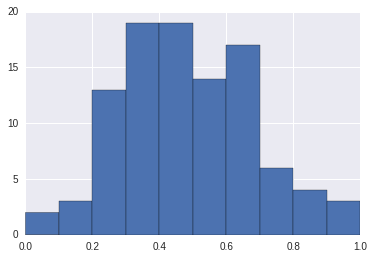

In [21]:
plt.hist(arr, bins=10);

In [22]:
arr.sort()

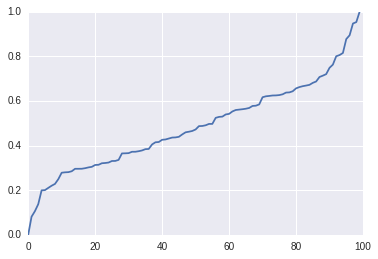

In [23]:
plt.plot(np.arange(arr.size), arr);

# Numba

In [25]:
from bokeh.plotting import *

In [26]:
output_notebook()

Loading BokehJS ...

In [27]:
import numba

In [28]:
position = np.random.uniform(size=400)
position = position.reshape((position.size // 2, 2))

In [29]:
p = figure()
p.circle(x=position[:, 0], y=position[:, 1])
show(p)

numpy concatenate

In [53]:
l = []

In [54]:
arr = np.random.uniform(size=200).reshape((2, 100))

In [55]:
for _ in range(1000):
    l.append(arr)

In [62]:
a = np.array(l)

In [63]:
a.shape

(1000, 2, 100)

In [64]:
ls

field.ipynb        parameters.ipynb  social_force.ipynb  visualization.ipynb
game_theory.ipynb  scratch.ipynb     system.ipynb


In [68]:
import h5py

In [97]:
f = h5py.File("foo.hdf5", mode="w")

In [98]:
dset = f.create_dataset("arr", data=a)

In [99]:
f.close()